In [1]:
import pandas as pd
spaceData=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

In [2]:
print(spaceData.info())
print(spaceData.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
(8693, 14)


In [3]:
# spaceData.drop(columns=['PassengerId','HomePlanet','CryoSleep'])
spaceData.groupby('Transported').mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,389.266066,382.615930,167.566217,564.382666,543.629822
True,27.748834,63.098021,532.691984,179.829972,61.675531,69.148131


**Insight**
An age of nearly 29.92285 results in not transported and vice versa
Similarly by using the above frame , we can understand the relation between **float dtype columns**

Thus we can understand, all this columns are **related to transported** ie target..

So we **should not drop** any of those columns!

<AxesSubplot:xlabel='Transported'>

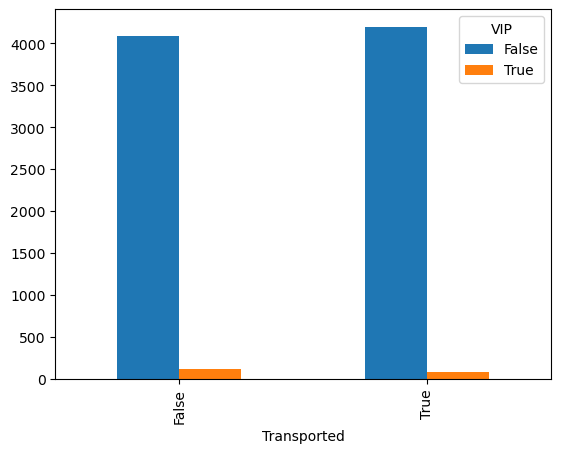

In [4]:
pd.crosstab(spaceData.Transported,spaceData.VIP).plot(kind='bar')

> **INSIGHT**

From the above bar chart we can understand that VIP doesnt matter in the target column as an **assusmption**.
So we drop the 'VIP' column from our data

In [5]:
spaceData['VIP'].value_counts()
spaceData.drop(columns=['VIP'],inplace=True)

<AxesSubplot:xlabel='Transported'>

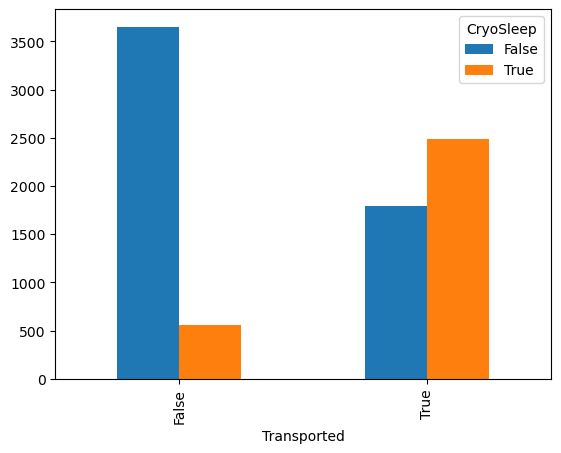

In [6]:
pd.crosstab(spaceData.Transported,spaceData.CryoSleep).plot(kind='bar')

In [7]:
spaceData.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

<AxesSubplot:xlabel='Transported'>

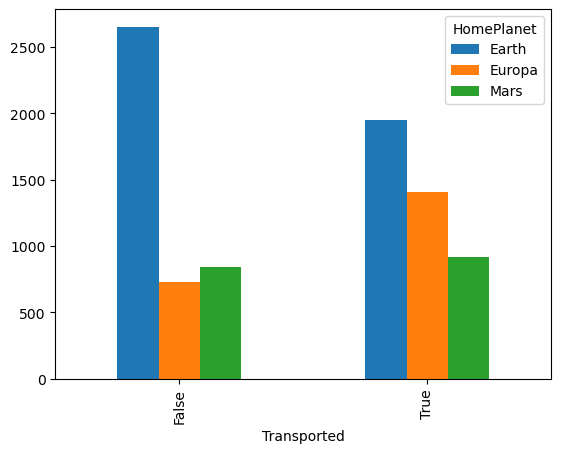

In [8]:
pd.crosstab(spaceData.Transported,spaceData.HomePlanet).plot(kind='bar')

<AxesSubplot:xlabel='Transported'>

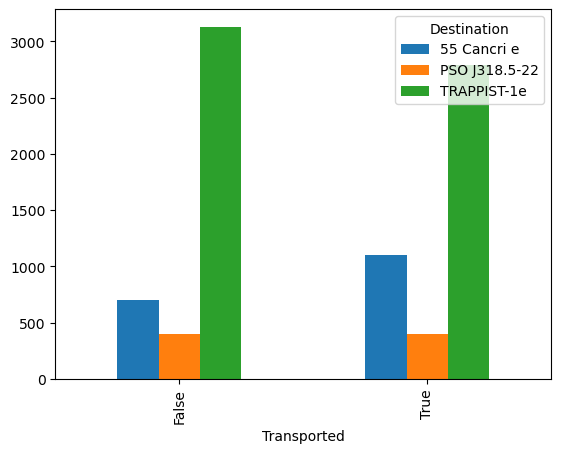

In [9]:
pd.crosstab(spaceData.Transported,spaceData.Destination).plot(kind='bar')

In [10]:
spaceData.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

**Insight**

From the above charts we understood,
- Destination
- VIP
- Name (not by charts)
- Passenger Id (not by charts)

Are not needed to predict the target column transported

In [11]:
spaceData.drop(columns=['PassengerId','Name','Destination'],axis=1,inplace=True)

In [12]:
spaceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Age           8514 non-null   float64
 4   RoomService   8512 non-null   float64
 5   FoodCourt     8510 non-null   float64
 6   ShoppingMall  8485 non-null   float64
 7   Spa           8510 non-null   float64
 8   VRDeck        8505 non-null   float64
 9   Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(3)
memory usage: 619.8+ KB


In [13]:
spaceData.Cabin.value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

**Insight**

Since the 'cabin' contains more unique values, it makes the prediction too complex and it really doesnt affects our target prediction.

So we removed Cabin column from our data

In [14]:
spaceData.drop(columns=['Cabin'],inplace=True)

In [15]:
spaceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Age           8514 non-null   float64
 3   RoomService   8512 non-null   float64
 4   FoodCourt     8510 non-null   float64
 5   ShoppingMall  8485 non-null   float64
 6   Spa           8510 non-null   float64
 7   VRDeck        8505 non-null   float64
 8   Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(2)
memory usage: 551.9+ KB


In [16]:
spaceData['HomePlanet']=spaceData['HomePlanet'].astype('category')
spaceData['HomePlanet']=spaceData['HomePlanet'].cat.codes
spaceData['CryoSleep']=spaceData['CryoSleep'].astype('category')
spaceData['CryoSleep']=spaceData['CryoSleep'].cat.codes
spaceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int8   
 1   CryoSleep     8693 non-null   int8   
 2   Age           8514 non-null   float64
 3   RoomService   8512 non-null   float64
 4   FoodCourt     8510 non-null   float64
 5   ShoppingMall  8485 non-null   float64
 6   Spa           8510 non-null   float64
 7   VRDeck        8505 non-null   float64
 8   Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int8(2)
memory usage: 433.1 KB


**Explanation**

The above program is to convert the object dtype columns ('HomePlanet','CryoSleep') into int data types using astype() and cat.codes method

In [17]:
spaceData.isnull().sum()

HomePlanet        0
CryoSleep         0
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [18]:
spaceData['Age']=spaceData['Age'].fillna(spaceData['Age'].median()).astype(int)
spaceData['RoomService']=spaceData['RoomService'].fillna(spaceData['RoomService'].mean()).astype(int)
spaceData['Spa']=spaceData['Spa'].fillna(spaceData['Spa'].mean()).astype(int)
spaceData['VRDeck']=spaceData['VRDeck'].fillna(spaceData['VRDeck'].mean()).astype(int)
spaceData['FoodCourt']=spaceData['FoodCourt'].fillna(spaceData['FoodCourt'].mean()).astype(int)
spaceData['ShoppingMall']=spaceData['ShoppingMall'].fillna(spaceData['ShoppingMall'].mean()).astype(int)
spaceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   HomePlanet    8693 non-null   int8 
 1   CryoSleep     8693 non-null   int8 
 2   Age           8693 non-null   int64
 3   RoomService   8693 non-null   int64
 4   FoodCourt     8693 non-null   int64
 5   ShoppingMall  8693 non-null   int64
 6   Spa           8693 non-null   int64
 7   VRDeck        8693 non-null   int64
 8   Transported   8693 non-null   bool 
dtypes: bool(1), int64(6), int8(2)
memory usage: 433.1 KB


**Explanation**

In the above program

- Age column
    - median of ages has been filled instead of null values because mean gives float whereas age should be int dtype
- Other float dtype columns
    - filled the NA values with its mean and then convert the column into int dtype.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
LRModel=LogisticRegression()
X=spaceData.drop(columns=['Transported'])
y=pd.DataFrame(spaceData['Transported'])
print(X.info(),"\n",y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   HomePlanet    8693 non-null   int8 
 1   CryoSleep     8693 non-null   int8 
 2   Age           8693 non-null   int64
 3   RoomService   8693 non-null   int64
 4   FoodCourt     8693 non-null   int64
 5   ShoppingMall  8693 non-null   int64
 6   Spa           8693 non-null   int64
 7   VRDeck        8693 non-null   int64
dtypes: int64(6), int8(2)
memory usage: 424.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Transported  8693 non-null   bool 
dtypes: bool(1)
memory usage: 8.6 KB
None 
 None


In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
print(X_train.info(),"\n",X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7823 entries, 8206 to 130
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   HomePlanet    7823 non-null   int8 
 1   CryoSleep     7823 non-null   int8 
 2   Age           7823 non-null   int64
 3   RoomService   7823 non-null   int64
 4   FoodCourt     7823 non-null   int64
 5   ShoppingMall  7823 non-null   int64
 6   Spa           7823 non-null   int64
 7   VRDeck        7823 non-null   int64
dtypes: int64(6), int8(2)
memory usage: 443.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 1451 to 7620
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   HomePlanet    870 non-null    int8 
 1   CryoSleep     870 non-null    int8 
 2   Age           870 non-null    int64
 3   RoomService   870 non-null    int64
 4   FoodCourt     870 non-null    int64
 5   ShoppingMall  870 non-null    int

In [21]:
y_train.info()
y_train=y_train.squeeze()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7823 entries, 8206 to 130
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Transported  7823 non-null   bool 
dtypes: bool(1)
memory usage: 68.8 KB


**Explanation**


Squeeze() is a method used to convert 2d array into 1d array 

ie (7823, 1) to (7823, )

In [22]:
LRModel.fit(X_train,y_train)
y_pred=LRModel.predict(X_test)
# print(LRModel.score(y_pred,y_test),"\n",LRModel.score(X_test,y_test))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [23]:
print(y_pred)

[False False False False False False False  True  True  True  True  True
 False False  True False False  True  True False  True False  True  True
 False  True  True  True  True  True  True  True  True  True False  True
 False False  True False False  True  True False  True  True False False
 False  True False False  True  True  True False False  True False  True
  True False  True  True False  True  True False False False  True False
  True False False  True False  True False  True  True  True False False
  True False False False  True False  True  True False  True  True  True
  True False  True  True False  True False False False  True  True False
 False False  True  True  True  True  True False False False False False
 False  True  True  True False  True  True False  True  True  True  True
 False  True False  True  True False False False False False False False
  True  True  True  True  True  True  True  True  True  True  True False
  True  True False False  True False False False Fa

In [24]:
y_pred=pd.Series(y_pred)
y_pred=y_pred.to_frame(name="Transported")

In [25]:
print(LRModel.score(X_test,y_test))

0.7632183908045977


**Explanation**

Now, Target as bool dtype has been predicted and results in 0.7609 accuracy (76%)

But our submission file should predict it by int value, 

# so let us train out model with transport column as int dtype

In [26]:
y_train=y_train.astype('category')
y_train=y_train.cat.codes
y_train.head()

8206    1
6097    1
8409    1
6163    1
8101    0
dtype: int8

In [27]:
y_test['Transported']=y_test['Transported'].astype('category')
y_test['Transported']=y_test['Transported'].cat.codes
y_test.info()
y_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 1451 to 7620
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Transported  870 non-null    int8 
dtypes: int8(1)
memory usage: 7.6 KB


,Transported
1451,0
2214,0
6898,1
3861,0
5127,1


In [28]:
LRModel.fit(X_train,y_train)
y_pred=LRModel.predict(X_test)
# print(LRModel.score(y_pred,y_test),"\n",LRModel.score(X_test,y_test))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [29]:
y_pred=pd.Series(y_pred)
y_pred=y_pred.to_frame(name="Transported")
print(LRModel.score(X_test,y_test))

0.7632183908045977


**Explanation**

Now also, our model works as same as before , because dtype doesnt matter in the accuracy!!


# **Let us see, whether adding VIP column improves our accuracy by doing all the steps done before**

In [30]:
subData=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
subData=subData['VIP']

In [31]:
subData=subData.astype('category')

In [32]:
subData=subData.cat.codes
subData=subData.to_frame(name="VIP")

In [33]:
spaceData=pd.concat([spaceData,subData],axis='columns')

In [34]:
spaceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   HomePlanet    8693 non-null   int8 
 1   CryoSleep     8693 non-null   int8 
 2   Age           8693 non-null   int64
 3   RoomService   8693 non-null   int64
 4   FoodCourt     8693 non-null   int64
 5   ShoppingMall  8693 non-null   int64
 6   Spa           8693 non-null   int64
 7   VRDeck        8693 non-null   int64
 8   Transported   8693 non-null   bool 
 9   VIP           8693 non-null   int8 
dtypes: bool(1), int64(6), int8(3)
memory usage: 441.6 KB


In [35]:
subData.isnull().sum()

VIP    0
dtype: int64

In [36]:
X=spaceData.drop(columns=['Transported'])
y=pd.DataFrame(spaceData['Transported'])
print(X.info(),"\n",y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   HomePlanet    8693 non-null   int8 
 1   CryoSleep     8693 non-null   int8 
 2   Age           8693 non-null   int64
 3   RoomService   8693 non-null   int64
 4   FoodCourt     8693 non-null   int64
 5   ShoppingMall  8693 non-null   int64
 6   Spa           8693 non-null   int64
 7   VRDeck        8693 non-null   int64
 8   VIP           8693 non-null   int8 
dtypes: int64(6), int8(3)
memory usage: 433.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Transported  8693 non-null   bool 
dtypes: bool(1)
memory usage: 8.6 KB
None 
 None


In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
print(X_train.info(),"\n",X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7823 entries, 2273 to 557
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   HomePlanet    7823 non-null   int8 
 1   CryoSleep     7823 non-null   int8 
 2   Age           7823 non-null   int64
 3   RoomService   7823 non-null   int64
 4   FoodCourt     7823 non-null   int64
 5   ShoppingMall  7823 non-null   int64
 6   Spa           7823 non-null   int64
 7   VRDeck        7823 non-null   int64
 8   VIP           7823 non-null   int8 
dtypes: int64(6), int8(3)
memory usage: 450.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 419 to 5552
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   HomePlanet    870 non-null    int8 
 1   CryoSleep     870 non-null    int8 
 2   Age           870 non-null    int64
 3   RoomService   870 non-null    int64
 4   FoodCourt     870 non-null    int6

In [38]:
LRModel.fit(X_train,y_train)
y_pred=LRModel.predict(X_test)
# print(LRModel.score(y_pred,y_test),"\n",LRModel.score(X_test,y_test))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [39]:
y_pred=pd.Series(y_pred)
y_pred=y_pred.to_frame(name="Transported")

In [40]:
print(LRModel.score(X_test,y_test))

0.7827586206896552


**Explanation**

Absolutely , It increases the accuracy by 2%. 

So, we **conclude** that VIP column is mandatory in the prediction

In [41]:
testData=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [42]:
testData.drop(columns=['PassengerId','Cabin','Destination','Name'],inplace=True)

In [43]:
testData.info()
testData['CryoSleep'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Age           4186 non-null   float64
 3   VIP           4184 non-null   object 
 4   RoomService   4195 non-null   float64
 5   FoodCourt     4171 non-null   float64
 6   ShoppingMall  4179 non-null   float64
 7   Spa           4176 non-null   float64
 8   VRDeck        4197 non-null   float64
dtypes: float64(6), object(3)
memory usage: 300.9+ KB


False    2640
True     1544
Name: CryoSleep, dtype: int64

In [44]:
testData['VIP'].value_counts()

False    4110
True       74
Name: VIP, dtype: int64

In [45]:
testData['HomePlanet'].value_counts()

Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

In [46]:
testData['HomePlanet']=testData['HomePlanet'].fillna('Earth')
testData['CryoSleep']=testData['CryoSleep'].fillna('False')
testData['VIP']=testData['VIP'].fillna('False')
testData['HomePlanet']=testData['HomePlanet'].astype('category')
testData['HomePlanet']=testData['HomePlanet'].cat.codes
testData['CryoSleep']=testData['CryoSleep'].astype('category')
testData['CryoSleep']=testData['CryoSleep'].cat.codes
testData['VIP']=testData['VIP'].astype('category')
testData['VIP']=testData['VIP'].cat.codes

In [47]:
testData['Age']=testData['Age'].fillna(testData['Age'].median())
testData['Age']=testData['Age'].astype(int)

In [48]:
pd.DataFrame(testData['Age']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     4277 non-null   int64
dtypes: int64(1)
memory usage: 33.5 KB


In [49]:
testData['RoomService']=testData['RoomService'].fillna(testData['RoomService'].median())
testData['RoomService']=testData['RoomService'].astype(int)
pd.DataFrame(testData['RoomService']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   RoomService  4277 non-null   int64
dtypes: int64(1)
memory usage: 33.5 KB


In [50]:
testData['FoodCourt']=testData['FoodCourt'].fillna(testData['FoodCourt'].median())
testData['FoodCourt']=testData['FoodCourt'].astype(int)
pd.DataFrame(testData['FoodCourt']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   FoodCourt  4277 non-null   int64
dtypes: int64(1)
memory usage: 33.5 KB


In [51]:
testData['ShoppingMall']=testData['ShoppingMall'].fillna(testData['ShoppingMall'].median())
testData['ShoppingMall']=testData['ShoppingMall'].astype(int)
pd.DataFrame(testData['ShoppingMall']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ShoppingMall  4277 non-null   int64
dtypes: int64(1)
memory usage: 33.5 KB


In [52]:
testData['Spa']=testData['Spa'].fillna(testData['Spa'].median())
testData['Spa']=testData['Spa'].astype(int)
pd.DataFrame(testData['Spa']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Spa     4277 non-null   int64
dtypes: int64(1)
memory usage: 33.5 KB


In [53]:
testData['VRDeck']=testData['VRDeck'].fillna(testData['VRDeck'].median())
testData['VRDeck']=testData['VRDeck'].astype(int)
pd.DataFrame(testData['VRDeck']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   VRDeck  4277 non-null   int64
dtypes: int64(1)
memory usage: 33.5 KB


**EXPLANATION**

All the above cells are used to change all the things that we did to our train data
such as
- changing all object columns to cat codes
- changing all float columns into int64
- filling the null values


In [54]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   HomePlanet    4277 non-null   int8 
 1   CryoSleep     4277 non-null   int8 
 2   Age           4277 non-null   int64
 3   VIP           4277 non-null   int8 
 4   RoomService   4277 non-null   int64
 5   FoodCourt     4277 non-null   int64
 6   ShoppingMall  4277 non-null   int64
 7   Spa           4277 non-null   int64
 8   VRDeck        4277 non-null   int64
dtypes: int64(6), int8(3)
memory usage: 213.1 KB


In [55]:
subData=testData['VIP']
testData.drop('VIP',axis=1,inplace=True)

**EXPLANATION**

# **We droped the VIP column and added it because **

- we trained our model with VIP column as our last column
- but here,it appears as 4 column
- This will lead to input mismatch and error!!

In [56]:
LRModel.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [57]:
testData=pd.concat([testData,subData],axis='columns')

In [58]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   HomePlanet    4277 non-null   int8 
 1   CryoSleep     4277 non-null   int8 
 2   Age           4277 non-null   int64
 3   RoomService   4277 non-null   int64
 4   FoodCourt     4277 non-null   int64
 5   ShoppingMall  4277 non-null   int64
 6   Spa           4277 non-null   int64
 7   VRDeck        4277 non-null   int64
 8   VIP           4277 non-null   int8 
dtypes: int64(6), int8(3)
memory usage: 213.1 KB


In [59]:
prediction=LRModel.predict(testData)

In [60]:
final_submission=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
final_submission=pd.DataFrame(final_submission.PassengerId,columns=['PassengerId'])
print(final_submission.isnull().sum())
print(final_submission.shape,prediction.shape)
final_submission=pd.concat([final_submission,pd.DataFrame(prediction,columns=['Transported'])],axis='columns')
print(final_submission.info())
print(final_submission)

PassengerId    0
dtype: int64
(4277, 1) (4277,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB
None
     PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01         True
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]


In [61]:
final_submission.to_csv('submission.csv',index=False)